In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)
import plotly.express as px

In [3]:
#Reading the data
df=pd.read_csv(r'C:\Users\ranjan.kumar\Documents\python_videos\movies.csv')

In [5]:
df.head(2)

name rating      genre  year                       released  \
0      The Shining      R      Drama  1980  June 13, 1980 (United States)   
1  The Blue Lagoon      R  Adventure  1980   July 2, 1980 (United States)   

   score     votes         director                   writer            star  \
0    8.4  927000.0  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8   65000.0   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   

          country      budget       gross            company  runtime  
0  United Kingdom  19000000.0  46998772.0       Warner Bros.    146.0  
1   United States   4500000.0  58853106.0  Columbia Pictures    104.0

In [6]:
#removing all the records which has missing values
df=df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=False)

In [7]:
#checking for missing values
for col in df.columns:
    missing=np.mean(df[col].isnull())
    print('{} -- {}%'.format(col,missing))

name -- 0.0%
rating -- 0.0%
genre -- 0.0%
year -- 0.0%
released -- 0.0%
score -- 0.0%
votes -- 0.0%
director -- 0.0%
writer -- 0.0%
star -- 0.0%
country -- 0.0%
budget -- 0.0%
gross -- 0.0%
company -- 0.0%
runtime -- 0.0%


In [32]:
#filling null values with 0
df=df.fillna(0)

In [8]:
#changing the datatype of columns
df['votes']=df['votes'].astype('int')
df['budget']=df['budget'].astype('int')
df['gross']=df['gross'].astype('int')

In [23]:
df.head(2)

name rating      genre  year                       released  \
0      The Shining      R      Drama  1980  June 13, 1980 (United States)   
1  The Blue Lagoon      R  Adventure  1980   July 2, 1980 (United States)   

   score   votes         director                   writer            star  \
0    8.4  927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8   65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   

          country    budget     gross            company  runtime  
0  United Kingdom  19000000  46998772       Warner Bros.    146.0  
1   United States   4500000  58853106  Columbia Pictures    104.0

In [34]:
#create correct year column from the released year column
df['correctYear']=df['released'].astype(str).str[:4]

In [9]:
df.head(2)

name rating      genre  year                       released  \
0      The Shining      R      Drama  1980  June 13, 1980 (United States)   
1  The Blue Lagoon      R  Adventure  1980   July 2, 1980 (United States)   

   score   votes         director                   writer            star  \
0    8.4  927000  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8   65000   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   

          country    budget     gross            company  runtime  
0  United Kingdom  19000000  46998772       Warner Bros.    146.0  
1   United States   4500000  58853106  Columbia Pictures    104.0

In [10]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   
...                                          ...    ...        ...   ...   
272                                     Parasite      R     Horror  1982   
3203                                  Trojan War  PG-13     Comedy  1997   
3045                                     Titanic  PG-13      Drama  1997   
7445                           Avengers: Endgame  PG-13     Action  2019   
5445                                      Avatar  PG-13     Action  2009   

                               released  score    votes         director  \
6663  December 18, 2015 (United States)    7.8   876000      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000      Joss Whedon   
...                                 ...    ...      ...              ...   
272      March 12, 1982 (United States)    3.9     2300     Charles Band   
3203           October 1, 1997 (Brazil)    5.7     5800     George Huang   
3045  December 19, 1997 (United States)    7.8  1100000    James Cameron   
7445     April 26, 2019 (United States)    8.4   903000    Anthony Russo   
5445  December 18, 2009 (United States)    7.8  1100000    James Cameron   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   
...                  ...                ...            ...        ...   
272        Alan J. Adler    Robert Glaudini  United States     800000   
3203           Andy Burg       Will Friedle  United States   15000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
5445       James Cameron    Sam Worthington  United States  237000000   

           gross                company  runtime  
6663  2069521700              Lucasfilm    138.0  
7244  2048359754         Marvel Studios    149.0  
7480  1670727580   Walt Disney Pictures    118.0  
6653  1670516444     Universal Pictures    124.0  
6043  1518815515         Marvel Studios    143.0  
...          ...                    ...      ...  
272         2270       Embassy Pictures     85.0  
3203         309               Daybreak     85.0  
3045 -2147483648  Twentieth Century Fox    194.0  
7445 -2147483648         Marvel Studios    181.0  
5445 -2147483648  Twentieth Century Fox    162.0  

[5421 rows x 15 columns]

In [11]:
#For the availablity of all the data with dropdown
pd.set_option('display.max_rows',None)

In [12]:
#drop duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [13]:
fig=px.scatter(df,x='budget',y='gross',trendline='ols')
fig.show()

In [15]:
correlation=df.corr()


<AxesSubplot:>

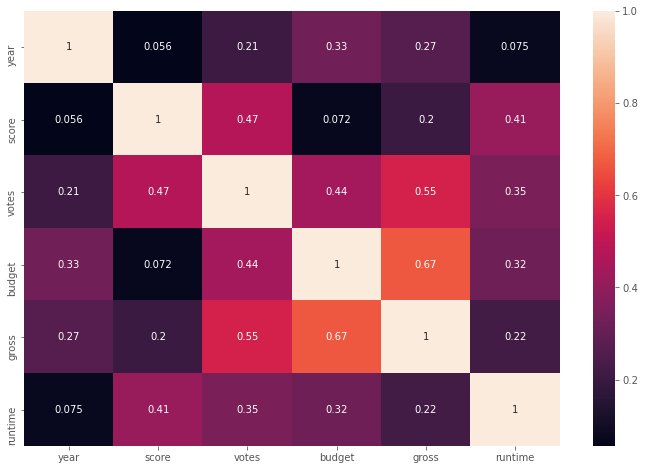

In [16]:
#checking the corrleation of all the columns
sns.heatmap(correlation,annot=True)

In [17]:
#changing the object type columns into numeric

df_numerized=df
for col in df_numerized:
    if df_numerized[col].dtype==('object'):
        df_numerized[col]=df_numerized[col].astype('category')
        df_numerized[col]=df_numerized[col].cat.codes
df_numerized        

name  rating  genre  year  released  score    votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000      1795    2832   
1     3929       6      1  1980      1127    5.8    65000      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000       757    1818   
3      204       4      4  1980      1127    7.7   221000       889    1413   
4      732       6      4  1980      1170    7.3   108000       719     351   
5     1509       6      9  1980      1922    6.4   123000      1758    3081   
6     3930       6      0  1980      1359    7.9   188000       974     576   
7     3122       6      3  1980       530    8.2   330000      1269    1257   
8     3732       4      0  1980      1346    6.8   101000      1606    1402   
9     4401       6      3  1980      1755    7.0    10000      2011     280   
10     332       4      0  1980       510    6.1    18000       236    2810   
11    4179       4      1  1980      2272    7.3    54000       817    1300   
12    3029       4      1  1980       471    5.3    30000      1643    1658   
13    2859       6      6  1980      2416    7.7    49000      1666    1653   
14    1208       6      5  1980      1170    7.1    37000       207     350   
15    3553       4      6  1980      2294    7.2    27000       847    2507   
17      66       4      4  1980       530    6.9    29000       333    2315   
18    4143       6      9  1980       832    6.8    66000       943    1486   
20     986       6      5  1980       714    6.5    20000      2032    3151   
21    1762       6      1  1980       117    6.8    14000      1307    2065   
22    4128       4      0  1980       213    6.7    22000       502    2959   
23    5289       4      8  1980       437    5.3    12000      1654    2492   
28     700       6      5  1980      1359    7.2    17000      1870    3099   
29     261       6      5  1980       667    6.2    22000      1489    2358   
33     785       4      6  1980       117    6.1      604      1146     673   
35    3068       6      4  1980      2156    6.2    24000       744    2207   
36    4245       6      4  1980      1883    6.3     4300       581     966   
37    2618       6      4  1980      2257    6.0    11000      1116    2578   
42    4736       6      0  1980      1413    7.1     9000      1613    1802   
46    4312       6      0  1980      1304    5.3     3900      1337    2383   
48    4512       4      0  1980      1922    5.1     3100       329    2036   
50    3648       4      4  1980      2476    7.3    22000      2043    3184   
51    2497       6      4  1980      2416    6.8     4500      1025     303   
53     692       4      0  1980      1289    6.1    11000       327     768   
56    5193       4      0  1980      1629    4.6     2600       793    1078   
57    2818       4      4  1980      1051    5.4     2400       914    2623   
58    4519       6      0  1980       261    5.1     5200       551    1819   
75    4351       1      1  1980      1399    5.8     1300       267     939   
77    5240       6      4  1980       261    5.9      415      1484    1339   
80    2971       6      6  1980      2551    4.0      546       969    1014   
92    1973       4      0  1981      1296    8.4   905000      1859    1806   
94     284       6      4  1981       314    7.5    97000       974    1524   
95    1301       6      0  1981      1040    7.2   131000       943    1486   
96    4100       2      9  1981        46    7.5   192000      1735    2707   
97    3031       6      4  1981      1568    6.2    40000       177     307   
98     603       6      5  1981      1162    7.4    47000       207     350   
99     861       4      0  1981      1296    6.9    42000       478     277   
100   1329       6      1  1981        11    7.4    59000       937    2963   
101   2389       6      0  1981      1805    7.6   170000       654    2941   
103   3699       6      4  1981      1406    6.9    6800

<AxesSubplot:>

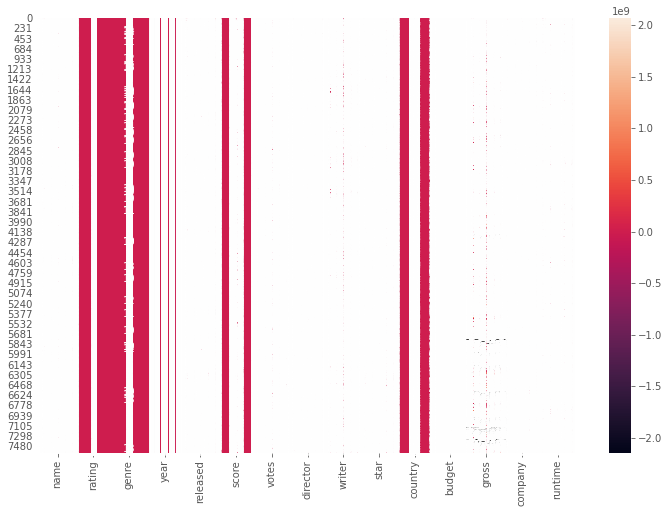

In [20]:
correlation=df_numerized
sns.heatmap(correlation,annot=True)

In [ ]:
#pairing to check the correlation
correlation_mat=df_numerized.corr()
correlation_pairs=correlation_mat.unstack()
correlation_pairs()